In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("CreditScoring.csv")
print(df.head())
print("******************************")
print("******************************")
print(df.isnull().sum())

   BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN  
******************************
******************************
BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


In [3]:
print(df.mean())
print("******************************")
print("******************************")
df.fillna(value=df.mean(),inplace=True)
print(df.head())
print("******************************")
print("******************************")
print(df.isnull().sum())

BAD             0.199497
LOAN        18607.969799
MORTDUE     73760.817200
VALUE      101776.048741
YOJ             8.922268
DEROG           0.254570
DELINQ          0.449442
CLAGE         179.766275
NINQ            1.186055
CLNO           21.296096
DEBTINC        33.779915
dtype: float64
******************************
******************************
   BAD  LOAN     MORTDUE          VALUE   REASON     JOB        YOJ    DEROG  \
0    1  1100  25860.0000   39025.000000  HomeImp   Other  10.500000  0.00000   
1    1  1300  70053.0000   68400.000000  HomeImp   Other   7.000000  0.00000   
2    1  1500  13500.0000   16700.000000  HomeImp   Other   4.000000  0.00000   
3    1  1500  73760.8172  101776.048741      NaN     NaN   8.922268  0.25457   
4    0  1700  97800.0000  112000.000000  HomeImp  Office   3.000000  0.00000   

     DELINQ       CLAGE      NINQ       CLNO    DEBTINC  
0  0.000000   94.366667  1.000000   9.000000  33.779915  
1  2.000000  121.833333  0.000000  14.000000  33.77

C:\Users\lenovo\AppData\Local\Temp/ipykernel_19004/229503445.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean())
C:\Users\lenovo\AppData\Local\Temp/ipykernel_19004/229503445.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(value=df.mean(),inplace=True)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x=df.drop(columns=["BAD","JOB","REASON"])
y=df["BAD"]
print(x.head())
print("******************************")
print("******************************")
print(x.isnull().sum())

   LOAN     MORTDUE          VALUE        YOJ    DEROG    DELINQ       CLAGE  \
0  1100  25860.0000   39025.000000  10.500000  0.00000  0.000000   94.366667   
1  1300  70053.0000   68400.000000   7.000000  0.00000  2.000000  121.833333   
2  1500  13500.0000   16700.000000   4.000000  0.00000  0.000000  149.466667   
3  1500  73760.8172  101776.048741   8.922268  0.25457  0.449442  179.766275   
4  1700  97800.0000  112000.000000   3.000000  0.00000  0.000000   93.333333   

       NINQ       CLNO    DEBTINC  
0  1.000000   9.000000  33.779915  
1  0.000000  14.000000  33.779915  
2  1.000000  10.000000  33.779915  
3  1.186055  21.296096  33.779915  
4  0.000000  14.000000  33.779915  
******************************
******************************
LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


In [5]:
x_train , x_test,y_train , y_test=train_test_split(x,y,test_size=0.33,random_state=1)
from sklearn import tree
model=tree.DecisionTreeClassifier()

model.fit(x_train,y_train)
y_pre=model.predict(x_test)
a=accuracy_score(y_test,y_pre)
print("accuracy score avant :",a)

Filtre=VarianceThreshold(threshold=1.00488)
Donnees_Filtrees=Filtre.fit_transform(x_train)
FS=list(Filtre.get_support())
X=[]
for i in range(0,len(FS)):
    if FS[i]==True:
        X+=[i]

print(Filtre.get_support())   
print(FS)
print(X)
print(tuple(X))
print(x_train[:,tuple(X)])

accuracy score avant : 0.8622267412303


NameError: name 'VarianceThreshold' is not defined

In [6]:
model.fit(x_train[:,tuple(X)],y_train)
y_pre=model.predict(x_test[:,tuple(X)])
a=accuracy_score(y_test,y_pre)
print("accuracy score avant :",a)

NameError: name 'X' is not defined

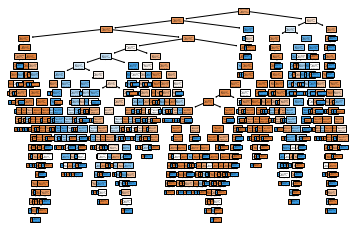

In [7]:
tree.plot_tree(model, filled=True)
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(model, out_file=f, filled=True)

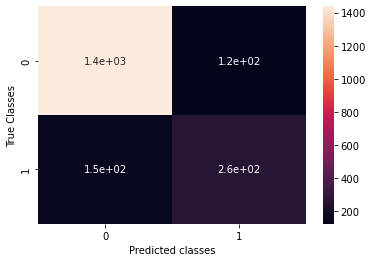

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,y_pre),annot=True)
plt.ylabel('True Classes')
plt.xlabel('Predicted classes')
plt.show()


In [9]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(model,out_file=dot_data,filled=True,rounded=True,
               special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
svg_graph=graph.create_svg()
svg=open('tree.svg','wb')
svg.write(svg_graph)
svg.close()
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
from sklearn.feature_selection import VarianceThreshold
def trouver_donnees_importantes1(x_train,TR):
    Filtre=VarianceThreshold(threshold=TR)
    Donnees_Filtrees=Filtre.fit_transform(x_train)
    FS=list(Filtre.get_support());
    X=[]
    for i in range(0,len(FS)):
        if FS[i]==True:
            X+=[i]
    return tuple(X)

from sklearn.feature_selection import chi2
def trouver_donnees_importantes2(X,Y,K_best):
    selector=SelectKBest(chi2,k=K_best)
    Donnees_Filtrees=selector.fit_transform(X,Y)
    FS=list(selector.get_support());
    X=[]
    for i in range(0,len(FS)):
        if FS[i]==True:
            X+=[i]
    return tuple(X)

In [3]:
import sklearn
print(sklearn.__version__)

0.24.2
